Chapter 15 - Survival Analysis

In [1]:
import pandas as pd

In [2]:
bladder = pd.read_csv('C:/Users/franj/notebooks/pandas for everyone/pandas-for-everyone/data/bladder.csv')

print(bladder)

     id  rx  number  size  stop  event  enum
0     1   1       1     3     1      0     1
1     1   1       1     3     1      0     2
2     1   1       1     3     1      0     3
3     1   1       1     3     1      0     4
4     2   1       2     1     4      0     1
..   ..  ..     ...   ...   ...    ...   ...
335  84   2       2     1    54      0     4
336  85   2       1     3    59      0     1
337  85   2       1     3    59      0     2
338  85   2       1     3    59      0     3
339  85   2       1     3    59      0     4

[340 rows x 7 columns]


In [3]:
print(bladder['rx'].value_counts())

rx
1    188
2    152
Name: count, dtype: int64


In [4]:
from lifelines import KaplanMeierFitter

In [5]:
kmf = KaplanMeierFitter()
kmf.fit(bladder['stop'], event_observed=bladder['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 340 total observations, 228 right-censored observations>

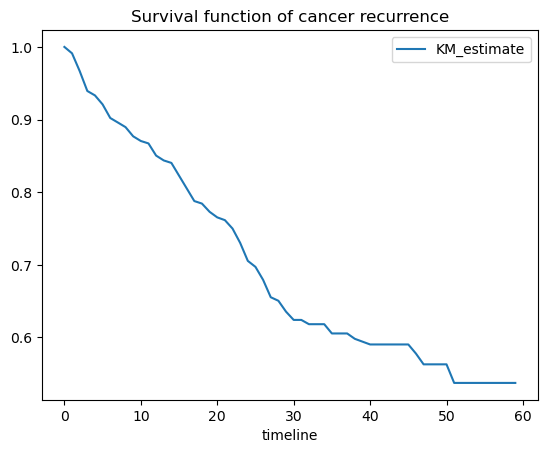

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
kmf.survival_function_.plot(ax=ax)
ax.set_title('Survival function of cancer recurrence')

plt.show()

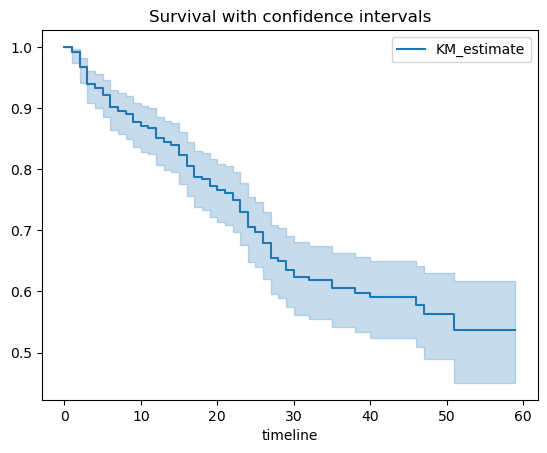

In [7]:
fig, ax = plt.subplots()
kmf.plot(ax=ax)
ax.set_title('Survival with confidence intervals')
plt.show()

In [8]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

In [9]:
cph_bladder_df = bladder[["rx", "number", "size", "stop", "event"]]
cph.fit(cph_bladder_df, duration_col='stop', event_col='event')

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>

In [10]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>
             duration col = 'stop'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 340
number of events observed = 112
   partial log-likelihood = -588.10
         time fit was run = 2025-03-26 08:51:51 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
rx        -0.54      0.58      0.20           -0.93           -0.15                0.39                0.86
number     0.19      1.21      0.05            0.10            0.28                1.11                1.33
size      -0.05      0.95      0.07           -0.19            0.08                0.83                1.08

           cmp to     z      p  -log2(p)
covariate                               
rx           0.00 -2.70   0.01      7.18
number       0.00  4.17 <0.005     15.01
size         0.00 -0.79   0.43      1.22
---
Concordance = 0.64
Partial AIC = 1182.21
log-likelihood ratio test = 22.32 on 3 df
-log2(p) of ll-ratio test = 14.13

<Axes: xlabel='log(timeline)', ylabel='log(-log(survival_function_))'>

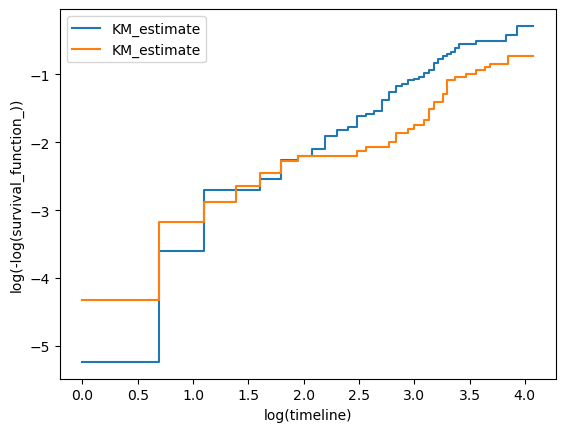

In [11]:
# testing the cox model assumptions
rx1 = bladder.loc[bladder['rx'] == 1]
rx2 = bladder.loc[bladder['rx'] == 2]

kmf1 = KaplanMeierFitter()
kmf1.fit(rx1['stop'], event_observed=rx1['event'])

kmf2 = KaplanMeierFitter()
kmf2.fit(rx2['stop'], event_observed=rx2['event'])

fig, axes = plt.subplots()

# put both plots on the same axes
kmf1.plot_loglogs(ax=axes)
kmf2.plot_loglogs(ax=axes)

In [12]:
axes.legend(['rx=1', 'rx=2'])

plt.show()

In [13]:
cph_strat = CoxPHFitter()
cph_strat.fit(cph_bladder_df, duration_col='stop', event_col='event', strata=['rx'])

cph_strat.print_summary()


<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>
             duration col = 'stop'
                event col = 'event'
                   strata = rx
      baseline estimation = breslow
   number of observations = 340
number of events observed = 112
   partial log-likelihood = -516.17
         time fit was run = 2025-03-26 09:03:50 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
number     0.19      1.21      0.05            0.10            0.28                1.10                1.32
size      -0.05      0.95      0.07           -0.19            0.08                0.83                1.09

           cmp to     z      p  -log2(p)
covariate                               
number       0.00  4.09 <0.005     14.53
size         0.00 -0.78   0.44      1.20
---
Concordance = 0.60
Partial AIC = 1036.34
log-likelihood ratio test = 16.54 on 2 df
-log2(p) of ll-ratio test = 11.93